# study beam-flux uncertainties using event-weight

In [1]:
import sys; sys.path.insert(0, '../../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/'

versions:
{   'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'beam off': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'beam on': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'data date': '2018_08_16',
    'overlay date': '2018_09_22'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.051017899728 = N(POT on beam)/N(POT MC)


In [2]:
versions['beam on']='prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off']='prod_reco_optfilter_extbnb_v12_mcc8_dev'
versions['data date']='2018_08_16'

In [3]:
versions['Overlay']='prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
versions['overlay date']='2018_10_11'
evtwgt_name = 'piminus_PrimaryHadronSWCentralSplineVariation'
extract_Xsec_full_chain(evtwgt_name=evtwgt_name,extra_name=evtwgt_name,force_recalculated_weights=False)

did not find selected overlay files from piminus_PrimaryHadronSWCentralSplineVariation, so creating it...
2971 ccqe candidate pairs, 1885 in FV
777 are 1mu-1p, 26.2% of pairs
608 are other-pairs, 20.5% of pairs
1586 are cosmic, 53.4% of pairs
--------------------------------------------------------------
397 are CC1p, 13.4% of pairs
I finished loading overlay samples. We have in total 2971 pairs
applied cuts to overlay 

saved 117 selected 1mu-1p events to selected_1mu-1p.csv
saved 2 selected other-pairs events to selected_other-pairs.csv
saved 1 selected cosmic events to selected_cosmic.csv
saved 100 selected CC1p events to selected_CC1p.csv
saved 120 selected overlay to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_10_11_piminus_PrimaryHadronSWCentralSplineVariationselected_overlay.csv
Nevents['f(POT)']: 3.71542339778
100 selected CC1p events overlay
found selected on beam events and there was no file there...
loa

In [6]:
evtwgt_name = 'piplus_PrimaryHadronSWCentralSplineVariation'
extract_Xsec_full_chain(evtwgt_name=evtwgt_name,extra_name=evtwgt_name,force_recalculated_weights=False)

did not find selected overlay files from piplus_PrimaryHadronSWCentralSplineVariation, so creating it...
2971 ccqe candidate pairs, 1885 in FV
777 are 1mu-1p, 26.2% of pairs
608 are other-pairs, 20.5% of pairs
1586 are cosmic, 53.4% of pairs
--------------------------------------------------------------
397 are CC1p, 13.4% of pairs
I finished loading overlay samples. We have in total 2971 pairs
applied cuts to overlay 

saved 117 selected 1mu-1p events to selected_1mu-1p.csv
saved 2 selected other-pairs events to selected_other-pairs.csv
saved 1 selected cosmic events to selected_cosmic.csv
saved 100 selected CC1p events to selected_CC1p.csv
saved 120 selected overlay to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_10_11_piplus_PrimaryHadronSWCentralSplineVariationselected_overlay.csv
Nevents['f(POT)']: 3.71542339778
100 selected CC1p events overlay
found selected on beam events and there was no file there...
loade

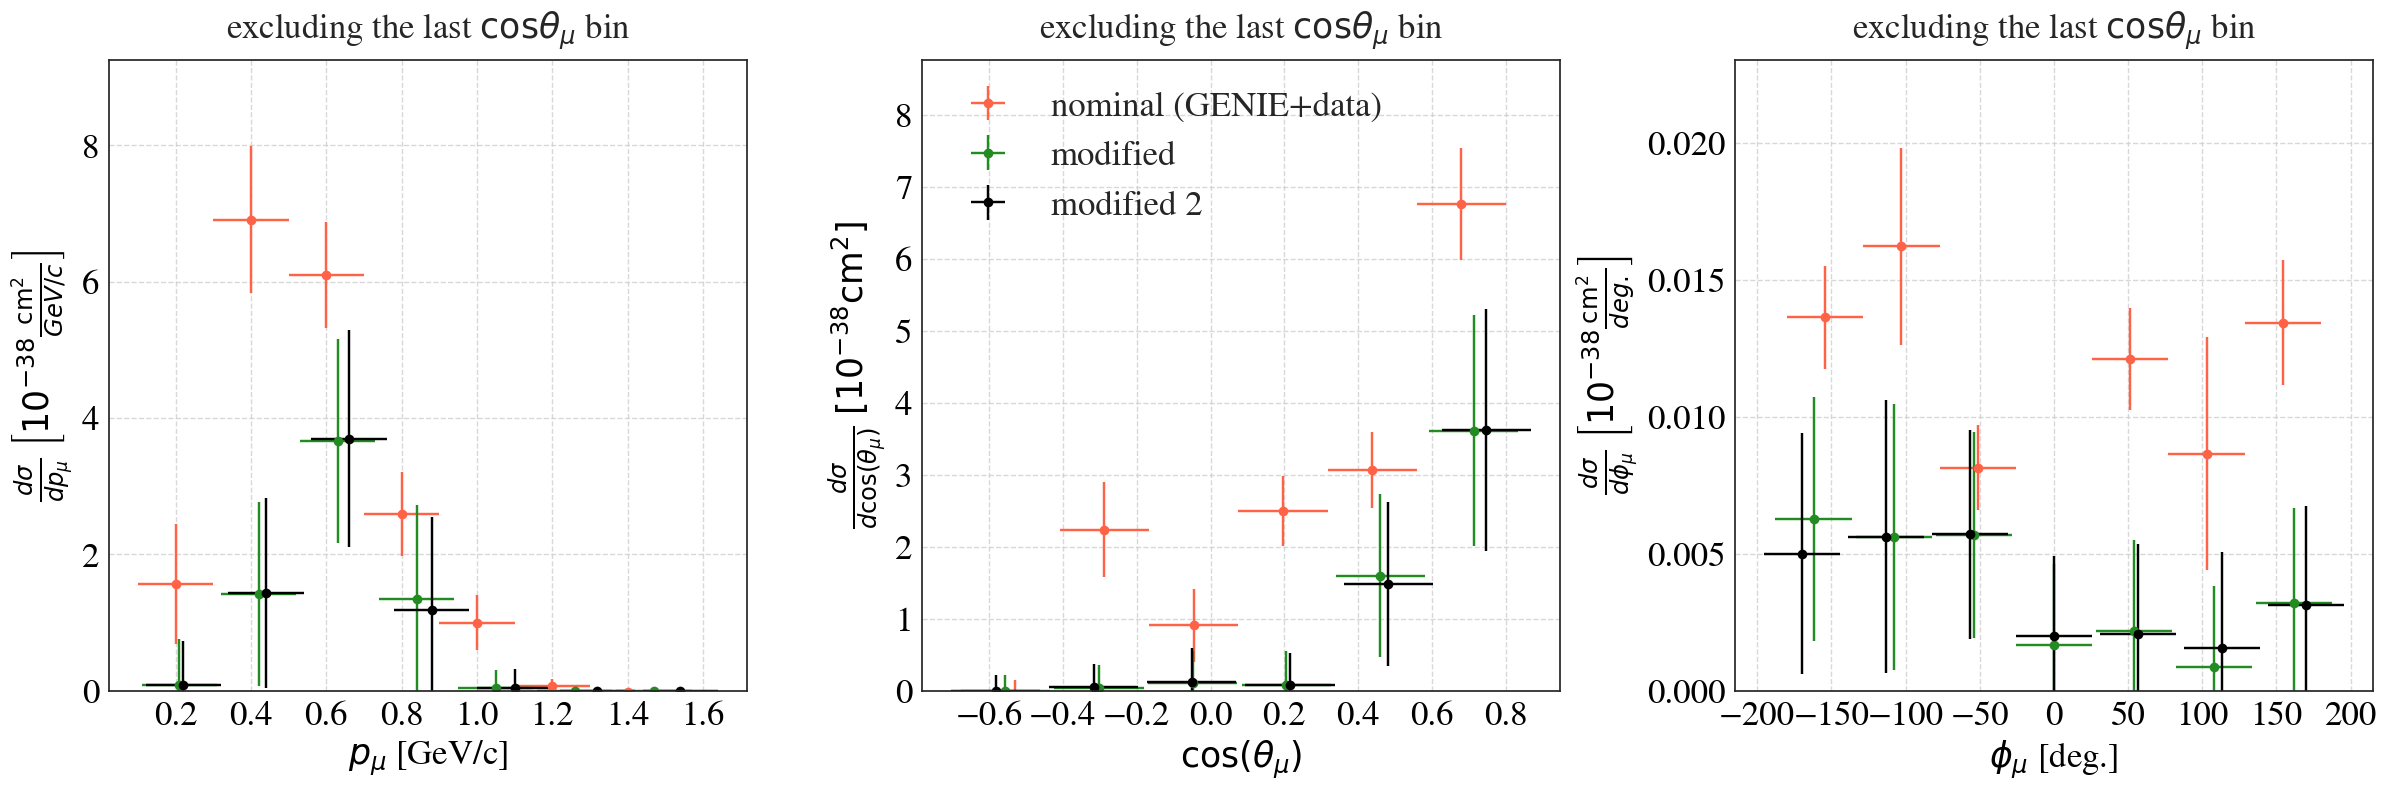

In [7]:
do_last_ctu_bin = False
for particle in ['mu']:
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D.txt", 'rb') as infile:#{
        nominal_Xsec_dicts = pickle.load(infile)
    #}
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D" + "piminus_PrimaryHadronSWCentralSplineVariation" + ".txt", 'rb') as infile:#{
        modified_Xsec_dicts = pickle.load(infile)
    #}
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D" + "piplus_PrimaryHadronSWCentralSplineVariation" + ".txt", 'rb') as infile:#{
        modified_Xsec_dicts_2 = pickle.load(infile)
    #}

    for iXsec,(Xsec_title,Xsec_fname,do_draw_Xsecs) in enumerate(zip(Xsec_ctu_titles,Xsec_fnames,[True,do_last_ctu_bin])):#{
        if do_draw_Xsecs==False: continue
        fig=plt.figure(figsize=(24,8))            
        Xsec_dict = nominal_Xsec_dicts[Xsec_title]
            
        for i,observable in enumerate(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']):#{
            var,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            if iXsec==0 and var=='reco_Pmu_cos_theta':
                mid=mid[:-1]; bin_width=bin_width[:-1]; bins=bins[:-1]
            ax = fig.add_subplot(1,3,i+1)
            
            for iana,(Xsec_dict,label,color) in enumerate(zip([nominal_Xsec_dicts[Xsec_title],modified_Xsec_dicts[Xsec_title],modified_Xsec_dicts_2[Xsec_title]],
                                                     ['nominal (GENIE+data)','modified','modified 2'],
                                                     [Colors['beam on'],'forestgreen','black']                            
                                                    )):
                h = dict()
                h['Xsec'],h['Xsec err'] = Xsec_dict[observable],Xsec_dict[observable+' err']
                h['mc Xsec'],h['mc Xsec err'] = Xsec_dict['mc '+observable], Xsec_dict['mc '+observable+' err']
                if iXsec==0 and var=='reco_Pmu_cos_theta':
                    h['Xsec']=h['Xsec'][:-1];h['Xsec err']=h['Xsec err'][:-1]
                    h['mc Xsec']=h['mc Xsec'][:-1];h['mc Xsec err']=h['mc Xsec err'][:-1]
                plt.errorbar(x=mid*(1+0.05*iana),
                             xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=color,fmt='o',label=label)
#                 ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'], width=bin_width, color=Colors['CC1p'],label='overlay') 
            set_axes(ax,xlabel,y_label=get_Xsec_label(vlabel,units)
                             ,do_add_grid=True,do_add_legend=True if 'Pmu_cos_theta' in var else False
                             ,ylim=(0,1.1*np.max(ax.get_ylim())))
            plt.title(Xsec_title, y=1.02,fontsize=25)
        plt.tight_layout(h_pad=0)

# full chain of cross-section extraction - nominal

In [3]:
versions['beam on']='prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off']='prod_reco_optfilter_extbnb_v12_mcc8_dev'
versions['data date']='2018_08_16'

In [23]:
versions['Overlay']='prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
versions['overlay date']='2018_09_22'
extract_Xsec_full_chain(extra_name='',force_recalculated_weights=True)

found selected overlay files from , loading them...
9538 selected CC1p events overlay
found  462 selected on beam and 15 beam off events...
found selected genie CC1p...
done loading samples...
no Pmu weights, computing them
done assiging Pmu weights and Pp weights and saving the files.
already performed correction for phi~0 and saved the samples...
saved cross-sections into /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/1d_Xsec/PmuXsecs_1D.txt
saved cross-sections into /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/1d_Xsec/PpXsecs_1D.txt


# save the differences as systematical uncertainties into a csv